# Olympic medalists data

In [1]:
import pandas as pd

In [3]:
medals = pd.read_csv("all_medalists.csv")

In [4]:
medals.sample(5)

City  Edition          Sport     Discipline               Athlete  \
27834    Beijing     2008     Basketball     Basketball        HOWARD, Dwight   
7822      London     1948         Rowing         Rowing           BONI, Bruno   
26994     Athens     2004     Volleyball  Beach volley.         REGO, Emanuel   
21195  Barcelona     1992     Volleyball     Volleyball      IZQUIERDO, Lilia   
21230  Barcelona     1992  Weightlifting  Weightlifting  YOTOV, Yoto Vassilev   

       NOC Gender                             Event Event_gender   Medal  
27834  USA    Men                        basketball            M    Gold  
7822   ITA    Men                 coxless pair (2-)            M  Bronze  
26994  BRA    Men                  beach volleyball            M    Gold  
21195  CUB  Women                        volleyball            W    Gold  
21230  BUL    Men  60 - 67.5kg, total (lightweight)            M  Silver

## Using .value_counts() for ranking
For this exercise, you will use the pandas Series method .value_counts() to determine the top 15 countries ranked by total number of medals.

Notice that .value_counts() sorts by values by default. The result is returned as a Series of counts indexed by unique entries from the original Series with values (counts) ranked in descending order.

The DataFrame has been pre-loaded for you as medals.

- Extract the 'NOC' column from the DataFrame medals and assign the result to country_names. Notice that this Series has repeated entries for every medal (of any type) a country has won in any Edition of the Olympics.
- Create a Series medal_counts by applying .value_counts() to the Series country_names.
- Print the top 15 countries ranked by total number of medals won. This has been done for you, so hit 'Submit Answer' to see the result.

In [5]:
# Select the 'NOC' column of medals: country_names
country_names = medals["NOC"]

In [6]:
# Count the number of medals won by each country: medal_counts
medal_counts = country_names.value_counts()

In [7]:
print(medal_counts.head(15))

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
Name: NOC, dtype: int64


## Using .pivot_table() to count medals by type
Rather than ranking countries by total medals won and showing that list, you may want to see a bit more detail. You can use a pivot table to compute how many separate bronze, silver and gold medals each country won. That pivot table can then be used to repeat the previous computation to rank by total medals won.

In this exercise, you will use .pivot_table() first to aggregate the total medals by type. Then, you can use .sum() along the columns of the pivot table to produce a new column. When the modified pivot table is sorted by the total medals column, you can display the results from the last exercise with a bit more detail.

- Construct a pivot table counted from the DataFrame medals, aggregating by 'count'. Use 'NOC' as the index, 'Athlete' for the values, and 'Medal' for the columns.
- Modify the DataFrame counted by adding a column counted['totals']. The new column 'totals' should contain the result of taking the sum along the columns (i.e., use .sum(axis='columns')).
- Overwrite the DataFrame counted by sorting it with the .sort_values() method. Specify the keyword argument ascending=False.
- Print the first 15 rows of counted using .head(15). This has been done for you, so hit 'Submit Answer' to see the result.

In [8]:
# Construct the pivot table: counted
counted = medals.pivot_table(index="NOC", values="Athlete", columns="Medal", aggfunc="count")

In [9]:
counted

Medal  Bronze   Gold  Silver
NOC                         
AFG       1.0    NaN     NaN
AHO       NaN    NaN     1.0
ALG       8.0    4.0     2.0
ANZ       5.0   20.0     4.0
ARG      88.0   68.0    83.0
..        ...    ...     ...
VIE       NaN    NaN     2.0
YUG     118.0  143.0   174.0
ZAM       1.0    NaN     1.0
ZIM       1.0   18.0     4.0
ZZX      10.0   23.0    15.0

[138 rows x 3 columns]

In [10]:
# Create the new column: counted['totals']
counted['totals'] = counted.sum(axis="columns")

In [11]:
# Sort counted by the 'totals' column
counted = counted.sort_values("totals", ascending=False)

In [12]:
#counted.to_excel("pivot_medals.xlsx")

In [13]:
# Print the top 15 rows of counted
print(counted.head(15))

Medal  Bronze    Gold  Silver  totals
NOC                                  
USA    1052.0  2088.0  1195.0  4335.0
URS     584.0   838.0   627.0  2049.0
GBR     505.0   498.0   591.0  1594.0
FRA     475.0   378.0   461.0  1314.0
ITA     374.0   460.0   394.0  1228.0
GER     454.0   407.0   350.0  1211.0
AUS     413.0   293.0   369.0  1075.0
HUN     345.0   400.0   308.0  1053.0
SWE     325.0   347.0   349.0  1021.0
GDR     225.0   329.0   271.0   825.0
NED     320.0   212.0   250.0   782.0
JPN     270.0   206.0   228.0   704.0
CHN     193.0   234.0   252.0   679.0
RUS     240.0   192.0   206.0   638.0
ROU     282.0   155.0   187.0   624.0


# Understanding the column labels

## Applying .drop_duplicates()
What could be the difference between the 'Event_gender' and 'Gender' columns? You should be able to evaluate your guess by looking at the unique values of the pairs (Event_gender, Gender) in the data. In particular, you should not see something like (Event_gender='M', Gender='Women'). However, you will see that, strangely enough, there is an observation with (Event_gender='W', Gender='Men').

The duplicates can be dropped using the .drop_duplicates() method, leaving behind the unique observations. The DataFrame has been loaded as medals.

- Select the columns 'Event_gender' and 'Gender'.
- Create a dataframe ev_gen_uniques containing the unique pairs contained in ev_gen.
- Print ev_gen_uniques. This has been done for you, so hit 'Submit Answer' to see the result.

In [14]:
# Select columns: ev_gen
ev_gen = medals[["Event_gender", "Gender"]]

In [15]:
ev_gen.head()

Event_gender Gender
0            M    Men
1            M    Men
2            M    Men
3            M    Men
4            M    Men

In [16]:
# Drop duplicate pairs: ev_gen_uniques
ev_gen_uniques = ev_gen.drop_duplicates()

# Print ev_gen_uniques
print(ev_gen_uniques)

      Event_gender Gender
0                M    Men
348              X    Men
416              W  Women
639              X  Women
23675            W    Men


## Finding possible errors with .groupby()
You will now use .groupby() to continue your exploration. Your job is to group by 'Event_gender' and 'Gender' and count the rows.

You will see that there is only one suspicious row: This is likely a data error.

The DataFrame is available to you as medals

- Group medals by 'Event_gender' and 'Gender'.
- Create a medal_count_by_gender DataFrame with a group count using the .count() method.
- Print medal_count_by_gender. This has been done for you, so hit 'Submit Answer' to view the result.

In [18]:
# Group medals by the two columns: medals_by_gender
medals_by_gender = medals.groupby(["Event_gender", "Gender"])

In [20]:
# Create a DataFrame with a group count: medal_count_by_gender
medal_count_by_gender = medals_by_gender.count()

In [21]:
# Print medal_count_by_gender
medal_count_by_gender

City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218

## Locating suspicious data
You will now inspect the suspect record by locating the offending row.

You will see that, according to the data, Joyce Chepchumba was a man that won a medal in a women's event. That is a data error as you can confirm with a web search.

- Create a Boolean Series with a condition that captures the only row that has medals.Event_gender == 'W' and medals.Gender == 'Men'. Be sure to use the & operator.
- Use the Boolean Series to create a DataFrame called suspect with the suspicious row.
- Print suspect. This has been done for you, so hit 'Submit Answer' to see the result.

In [23]:
# Create the Boolean Series: sus
sus = (medals.Event_gender =="W") & (medals.Gender == "Men")

In [24]:
sus

0        False
1        False
2        False
3        False
4        False
         ...  
29211    False
29212    False
29213    False
29214    False
29215    False
Length: 29216, dtype: bool

In [25]:
# Create a DataFrame with the suspicious row: suspect
suspect = medals[sus]

In [26]:
# Print suspect
suspect

City  Edition      Sport Discipline            Athlete  NOC Gender  \
23675  Sydney     2000  Athletics  Athletics  CHEPCHUMBA, Joyce  KEN    Men   

          Event Event_gender   Medal  
23675  marathon            W  Bronze

# Finding indexes with max or min values
df.smthing.idxmax() will return the index of the max. row

df.smthing.idxmax(axis="column) will returb the index of a column that contains max value

df.smthing.idxmin() will return the index of the min

df.smthing.idxmax(axis="column) will returb the index of a column that contains min value


## Using .nunique() to rank by distinct sports
You may want to know which countries won medals in the most distinct sports. The .nunique() method is the principal aggregation here. Given a categorical Series S, S.nunique() returns the number of distinct categories.

- Group medals by 'NOC'.
- Compute the number of distinct sports in which each country won medals. To do this, select the 'Sport' column from country_grouped and apply .nunique().
- Sort Nsports in descending order with .sort_values() and ascending=False.
- Print the first 15 rows of Nsports. This has been done for you, so hit 'Submit Answer' to see the result.

In [28]:
# Group medals by 'NOC': country_grouped
country_grouped = medals.groupby("NOC")

In [29]:
# Compute the number of distinct sports in which each country won medals: Nsports
Nsports = country_grouped["Sport"].nunique()

In [30]:
# Sort the values of Nsports in descending order
Nsports = Nsports.sort_values(ascending=False)

In [31]:
# Print the top 15 rows of Nsports
print(Nsports.head(15))

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
AUS    22
ESP    22
CAN    22
SWE    21
URS    21
ITA    21
NED    20
RUS    20
JPN    20
DEN    19
Name: Sport, dtype: int64


## Counting USA vs. USSR Cold War Olympic Sports
The Olympic competitions between 1952 and 1988 took place during the height of the Cold War between the United States of America (USA) & the Union of Soviet Socialist Republics (USSR). Your goal in this exercise is to aggregate the number of distinct sports in which the USA and the USSR won medals during the Cold War years.

The construction is mostly the same as in the preceding exercise. There is an additional filtering stage beforehand in which you reduce the original DataFrame medals by extracting data from the Cold War period that applies only to the US or to the USSR. The relevant country codes in the DataFrame, which has been pre-loaded as medals, are 'USA' & 'URS'.

- Using medals, create a Boolean Series called during_cold_war that is True when 'Edition' is >= 1952 and <= 1988.
- Using medals, create a Boolean Series called is_usa_urs that is True when 'NOC' is either 'USA' or 'URS'.
- Filter the medals DataFrame using during_cold_war and is_usa_urs to create a new DataFrame called cold_war_medals.
- Group cold_war_medals by 'NOC'.
- Create a Series Nsports from country_grouped using indexing & chained methods:
- Extract the column 'Sport'.
- Use .nunique() to get the number of unique elements in each group;
- Apply .sort_values(ascending=False) to rearrange the Series.
- Print the final Series Nsports. This has been done for you, so hit 'Submit Answer' to see the result!

In [2]:
medals = pd.read_csv("all_medalists.csv", parse_dates=True)

In [15]:
# Create a Boolean Series that is True when 'Edition' is between 1952 and 1988: during_cold_war
during_cold_war = (medals["Edition"] >=1952) & (medals["Edition"] <=1988)

In [16]:
during_cold_war.head()

0    False
1    False
2    False
3    False
4    False
Name: Edition, dtype: bool

In [17]:
# Extract rows for which 'NOC' is either 'USA' or 'URS': is_usa_urs
is_usa_urs = medals.NOC.isin(["USA", "URS"])

In [18]:
# Use during_cold_war and is_usa_urs to create the DataFrame: cold_war_medals
cold_war_medals = medals.loc[during_cold_war & is_usa_urs]

In [19]:
# Group cold_war_medals by 'NOC'
country_grouped = cold_war_medals.groupby("NOC")

In [20]:
# Create Nsports
Nsports = country_grouped["Sport"].nunique().sort_values(ascending=False)

In [21]:
Nsports

NOC
URS    21
USA    20
Name: Sport, dtype: int64

## Counting USA vs. USSR Cold War Olympic Medals
For this exercise, you want to see which country, the USA or the USSR, won the most medals consistently over the Cold War period.

There are several steps involved in carrying out this computation.

You'll need a pivot table with years ('Edition') on the index and countries ('NOC') on the columns. The entries will be the total number of medals each country won that year. If the country won no medals in a given edition, expect a NaN in that entry of the pivot table.
You'll need to slice the Cold War period and subset the 'USA' and 'URS' columns.
You'll need to make a Series from this slice of the pivot table that tells which country won the most medals in that edition using .idxmax(axis='columns'). If .max() returns the maximum value of Series or 1D array, .idxmax() returns the index of the maximizing element. The argument axis=columns or axis=1 is required because, by default, this aggregation would be done along columns for a DataFrame.
The final Series contains either 'USA' or 'URS' according to which country won the most medals in each Olympic edition. You can use .value_counts() to count the number of occurrences of each.

- Construct medals_won_by_country using medals.pivot_table().
- The index should be the years ('Edition') & the columns should be country ('NOC')
- The values should be 'Athlete' (which captures every medal regardless of kind) & the aggregation method should be 'count' (which captures the total number of medals won).
- Create cold_war_usa_urs_medals by slicing the pivot table medals_won_by_country. Your slice should contain the editions from years 1952:1988 and only the columns 'USA' & 'URS' from the pivot table.
- Create the Series most_medals by applying the .idxmax() method to cold_war_usa_urs_medals. Be sure to use axis='columns'.
- Print the result of applying .value_counts() to most_medals. The result reported gives the number of times each of the USA or the USSR won more Olympic medals in total than the other between 1952 and 1988.

In [23]:
# Create the pivot table: medals_won_by_country
medals_won_by_country = medals.pivot_table(index="Edition", columns="NOC", values="Athlete", aggfunc="count")

In [25]:
medals_won_by_country

NOC      AFG  AHO  ALG   ANZ   ARG  ARM    AUS   AUT  AZE  BAH  ...    URS  \
Edition                                                         ...          
1896     NaN  NaN  NaN   NaN   NaN  NaN    2.0   5.0  NaN  NaN  ...    NaN   
1900     NaN  NaN  NaN   NaN   NaN  NaN    5.0   6.0  NaN  NaN  ...    NaN   
1904     NaN  NaN  NaN   NaN   NaN  NaN    NaN   1.0  NaN  NaN  ...    NaN   
1908     NaN  NaN  NaN  19.0   NaN  NaN    NaN   1.0  NaN  NaN  ...    NaN   
1912     NaN  NaN  NaN  10.0   NaN  NaN    NaN  14.0  NaN  NaN  ...    NaN   
1920     NaN  NaN  NaN   NaN   NaN  NaN    6.0   NaN  NaN  NaN  ...    NaN   
1924     NaN  NaN  NaN   NaN  11.0  NaN   10.0   4.0  NaN  NaN  ...    NaN   
1928     NaN  NaN  NaN   NaN  32.0  NaN    4.0   4.0  NaN  NaN  ...    NaN   
1932     NaN  NaN  NaN   NaN   4.0  NaN    5.0   5.0  NaN  NaN  ...    NaN   
1936     NaN  NaN  NaN   NaN  11.0  NaN    1.0  50.0  NaN  NaN  ...    NaN   
1948     NaN  NaN  NaN   NaN  12.0  NaN   16.0   4.0  NaN  NaN  ...    NaN   
1952     NaN  NaN  NaN   NaN   6.0  NaN   20.0   3.0  NaN  NaN  ...  117.0   
1956     NaN  NaN  NaN   NaN   2.0  NaN   61.0   4.0  NaN  2.0  ...  169.0   
1960     NaN  NaN  NaN   NaN   4.0  NaN   36.0   3.0  NaN  NaN  ...  169.0   
1964     NaN  NaN  NaN   NaN   1.0  NaN   42.0   NaN  NaN  2.0  ...  174.0   
1968     NaN  NaN  NaN   NaN   2.0  NaN   49.0   5.0  NaN  NaN  ...  188.0   
1972     NaN  NaN  NaN   NaN   1.0  NaN   20.0   3.0  NaN  NaN  ...  211.0   
1976     NaN  NaN  NaN   NaN   NaN  NaN   24.0   1.0  NaN  NaN  ...  285.0   
1980     NaN  NaN  NaN   NaN   NaN  NaN   12.0   5.0  NaN  NaN  ...  442.0   
1984     NaN  NaN  2.0   NaN   NaN  NaN   50.0   3.0  NaN  NaN  ...    NaN   
1988     NaN  1.0  NaN   NaN  13.0  NaN   34.0   1.0  NaN  NaN  ...  294.0   
1992     NaN  NaN  2.0   NaN   2.0  NaN   57.0   6.0  NaN  1.0  ...    NaN   
1996     NaN  NaN  3.0   NaN  20.0  2.0  132.0   3.0  1.0  5.0  ...    NaN   
2000     NaN  NaN  5.0   NaN  20.0  1.0  183.0   4.0  3.0  6.0  ...    NaN   
2004     NaN  NaN  NaN   NaN  47.0  NaN  157.0   8.0  5.0  2.0  ...    NaN   
2008     1.0  NaN  2.0   NaN  51.0  6.0  149.0   3.0  7.0  5.0  ...    NaN   

NOC       URU    USA  UZB  VEN  VIE   YUG  ZAM   ZIM   ZZX  
Edition                                                     
1896      NaN   20.0  NaN  NaN  NaN   NaN  NaN   NaN   6.0  
1900      NaN   55.0  NaN  NaN  NaN   NaN  NaN   NaN  34.0  
1904      NaN  394.0  NaN  NaN  NaN   NaN  NaN   NaN   8.0  
1908      NaN   63.0  NaN  NaN  NaN   NaN  NaN   NaN   NaN  
1912      NaN  101.0  NaN  NaN  NaN   NaN  NaN   NaN   NaN  
1920      NaN  193.0  NaN  NaN  NaN   NaN  NaN   NaN   NaN  
1924     22.0  198.0  NaN  NaN  NaN   2.0  NaN   NaN   NaN  
1928     22.0   84.0  NaN  NaN  NaN  12.0  NaN   NaN   NaN  
1932      1.0  181.0  NaN  NaN  NaN   NaN  NaN   NaN   NaN  
1936      NaN   92.0  NaN  NaN  NaN   1.0  NaN   NaN   NaN  
1948      3.0  148.0  NaN  NaN  NaN  16.0  NaN   NaN   NaN  
1952     14.0  130.0  NaN  1.0  NaN  24.0  NaN   NaN   NaN  
1956     12.0  118.0  NaN  NaN  NaN  23.0  NaN   NaN   NaN  
1960      NaN  112.0  NaN  1.0  NaN  17.0  NaN   NaN   NaN  
1964      1.0  150.0  NaN  NaN  NaN  15.0  NaN   NaN   NaN  
1968      NaN  149.0  NaN  1.0  NaN  29.0  NaN   NaN   NaN  
1972      NaN  155.0  NaN  NaN  NaN  18.0  NaN   NaN   NaN  
1976      NaN  155.0  NaN  1.0  NaN  19.0  NaN   NaN   NaN  
1980      NaN    NaN  NaN  1.0  NaN  57.0  NaN  16.0   NaN  
1984      NaN  333.0  NaN  3.0  NaN  87.0  1.0   NaN   NaN  
1988      NaN  193.0  NaN  NaN  NaN  63.0  NaN   NaN   NaN  
1992      NaN  224.0  NaN  NaN  NaN   NaN  NaN   NaN   NaN  
1996      NaN  260.0  2.0  NaN  NaN  26.0  1.0   NaN   NaN  
2000      1.0  248.0  4.0  NaN  1.0  26.0  NaN   NaN   NaN  
2004      NaN  264.0  5.0  2.0  NaN   NaN  NaN   3.0   NaN  
2008      NaN  315.0  6.0  1.0  1.0   NaN  NaN   4.0   NaN  

[26 rows x 138 columns]

In [26]:
# Slice medals_won_by_country: cold_war_usa_urs_medals
cold_war_usa_urs_medals = medals_won_by_country.loc[1952:1988, ["USA","URS"]]

In [27]:
cold_war_usa_urs_medals

NOC        USA    URS
Edition              
1952     130.0  117.0
1956     118.0  169.0
1960     112.0  169.0
1964     150.0  174.0
1968     149.0  188.0
1972     155.0  211.0
1976     155.0  285.0
1980       NaN  442.0
1984     333.0    NaN
1988     193.0  294.0

In [28]:
# Create most_medals 
most_medals = cold_war_usa_urs_medals.idxmax(axis="columns")

In [30]:
most_medals

Edition
1952    USA
1956    URS
1960    URS
1964    URS
1968    URS
1972    URS
1976    URS
1980    URS
1984    USA
1988    URS
dtype: object

In [29]:
# Print most_medals.value_counts()
print(most_medals.value_counts())

URS    8
USA    2
dtype: int64


# Reshaping DataFrames for visualization

### Visualizing USA Medal Counts by Edition: Line Plot
Your job in this exercise is to visualize the medal counts by 'Edition' for the USA. The DataFrame has been pre-loaded for you as medals.

- Create a DataFrame usa with data only for the USA.
- Group usa such that ['Edition', 'Medal'] is the index. Aggregate the count over 'Athlete'.
- Use .unstack() with level='Medal' to reshape the DataFrame usa_medals_by_year.
- Construct a line plot from the final DataFrame usa_medals_by_year. This has been done for you, so hit 'Submit Answer' to see the plot!


In [13]:
import matplotlib.pyplot as plt

In [7]:
# Create the DataFrame: usa
usa = medals[medals["NOC"] == "USA"]

In [8]:
usa

City  Edition       Sport       Discipline          Athlete  NOC  \
11      Athens     1896   Athletics        Athletics    LANE, Francis  USA   
13      Athens     1896   Athletics        Athletics    BURKE, Thomas  USA   
15      Athens     1896   Athletics        Athletics   CURTIS, Thomas  USA   
19      Athens     1896   Athletics        Athletics    BLAKE, Arthur  USA   
21      Athens     1896   Athletics        Athletics    BURKE, Thomas  USA   
...        ...      ...         ...              ...              ...  ...   
29098  Beijing     2008  Volleyball       Volleyball       TOM, Logan  USA   
29099  Beijing     2008  Volleyball       Volleyball  WILLOUGHBY, Kim  USA   
29151  Beijing     2008   Wrestling  Wrestling Free.    CEJUDO, Henry  USA   
29161  Beijing     2008   Wrestling  Wrestling Free.    MILLER, Randi  USA   
29209  Beijing     2008   Wrestling  Wrestling Gre-R    WHEELER, Adam  USA   

      Gender         Event Event_gender   Medal  
11       Men          100m            M  Bronze  
13       Men          100m            M    Gold  
15       Men  110m hurdles            M    Gold  
19       Men         1500m            M  Silver  
21       Men          400m            M    Gold  
...      ...           ...          ...     ...  
29098  Women    volleyball            W  Silver  
29099  Women    volleyball            W  Silver  
29151    Men        - 55kg            M    Gold  
29161  Women     55 - 63kg            W  Bronze  
29209    Men     84 - 96kg            M  Bronze  

[4335 rows x 10 columns]

In [9]:
# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(["Edition","Medal"])["Athlete"].count()

In [15]:
# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level="Medal")


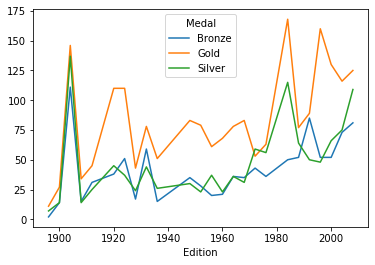

In [16]:
# Plot the DataFrame usa_medals_by_year
usa_medals_by_year.plot()
plt.show()

## Visualizing USA Medal Counts by Edition: Area Plot
As in the previous exercise, your job in this exercise is to visualize the medal counts by 'Edition' for the USA. This time, you will use an area plot to see the breakdown better. The usa DataFrame has been created and all reshaping from the previous exercise has been done. You need to write the plotting command.

- Create an area plot of usa_medals_by_year. This can be done by using .plot.area()

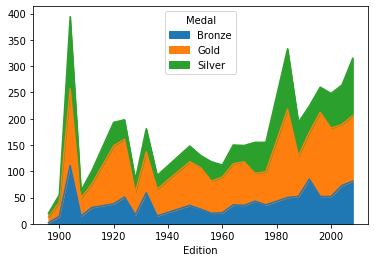

In [17]:
# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()

## Visualizing USA Medal Counts by Edition: Area Plot with Ordered Medals
You may have noticed that the medals are ordered according to a lexicographic (dictionary) ordering: Bronze < Gold < Silver. However, you would prefer an ordering consistent with the Olympic rules: Bronze < Silver < Gold.

You can achieve this using Categorical types. In this final exercise, after redefining the 'Medal' column of the DataFrame medals, you will repeat the area plot from the previous exercise to see the new ordering.

- Redefine the 'Medal' column of the DataFrame medals as an ordered categorical. To do this, use pd.Categorical() with three keyword arguments:
 - values = medals.Medal.
- categories=['Bronze', 'Silver', 'Gold'].
 - ordered=True.
- After this, you can verify that the type has changed using medals.info().
- Plot the final DataFrame usa_medals_by_year as an area plot. This has been done for you, so hit 'Submit Answer' to see how the plot has changed!

In [18]:
# Redefine 'Medal' as an ordered categorical
medals.Medal = pd.Categorical(values=medals.Medal, categories=["Bronze", "Silver", "Gold"], ordered=True)

In [19]:
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   City          29216 non-null  object  
 1   Edition       29216 non-null  int64   
 2   Sport         29216 non-null  object  
 3   Discipline    29216 non-null  object  
 4   Athlete       29216 non-null  object  
 5   NOC           29216 non-null  object  
 6   Gender        29216 non-null  object  
 7   Event         29216 non-null  object  
 8   Event_gender  29216 non-null  object  
 9   Medal         29216 non-null  category
dtypes: category(1), int64(1), object(8)
memory usage: 2.0+ MB


In [20]:
# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

In [21]:
# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

In [22]:
# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

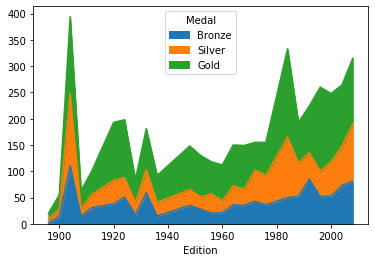

In [23]:
# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()